## Advanced Deep Learning with Keras

**Course Structure:**
* Chapter 1. The Keras Functional API
* Chapter 2. Two Input Networks Using Categorical Embeddings, Shared Layers, and Merge Layers
* Chapter 3. Multiple Inputs: 3 Inputs (and Beyond!)
* Chapter 4. Multiple Outputs

### CHAPTER 1. The Keras Functional API

#### Part 1.1 Keras input and dense layers

**Simple Keras models:**
1. Input layer
2. Output layer

* **Layers** are used to construct a deep learning model
* **Tensors** are used to define the data flow through the model

In [1]:
# Code for part 1.1

# input layer & dense layers
from keras.layers import Input, Dense

# create input layer
input_tensor = Input(shape=(1,))

# create output layer
output_layer = Dense(1)

# connect two layers
output_tensor = output_layer(input_tensor)

# alternative: connect directly
# output_tensor = Dense(1)(input_tensor)

#### Part 1.2 Build and compile a model

* Build a model with *'Model()'* class
* Compile a model with *'.compile()'* method
    * Specify optimizer
    * Specify loss 
* Summarize the model with *'model.summary()'*
* Plot the model using Keras: *'plot_model()'* and *'plt.imread()'*

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


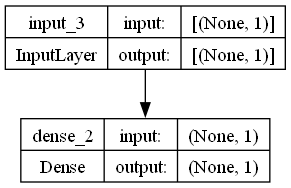

In [3]:
# Code for part 1.2 

# build a model
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model


# create input, output layers
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

# build the model
model = Model(input_tensor, output_tensor)

# compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

# save the model plot to file
plot_model(model, to_file='Images/17_model.png', show_shapes=True)

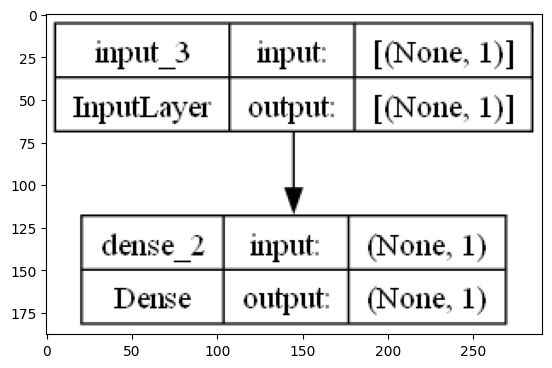

In [4]:
# Code for part 1.2 (continue)

# visualize the model
import matplotlib.pyplot as plt

data = plt.imread('Images/17_model.PNG')
plt.imshow(data)
plt.show()


#### Part 1.3 Fit and evaluate a model

* Data: basketball data
* Input: seed difference (-15 to +15)
* Output: score difference (-50 to +50)
* Fit the model to data with *'.fit()'* method
* Evaluate the model on *new data* with *'.evaluate()'* method

In [5]:
# Code for part 1.3

# fit the model to the tournament basketball data
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense

# get data
games_tourney = pd.read_csv('17_datasets/basketball_data/games_tourney.csv')
games_tourney_train = games_tourney.iloc[:3430, :]
games_tourney_test = games_tourney.iloc[3430:, :]

# build the model
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)
model = Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss='mae')

# now fit the model
model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
          epochs=1, batch_size=128, validation_split=0.1, verbose=True)

25/25 [==============================] - 2s 8ms/step - loss: 15.6368 - val_loss: 14.5739


In [6]:
# Code for part 1.3 (continue)

# evaluate the model on a test set

# get test data
X_test = games_tourney_test['seed_diff']
y_test = games_tourney_test['score_diff']

# evaluate the model
print(model.evaluate(X_test, y_test, verbose=True))

26/26 [==============================] - 0s 894us/step - loss: 14.6784
14.678404808044434


### CHAPTER 2. Two Input Networks Using Categorical Embeddings, Shared Layersm and Merge Layers

#### Part 2.1 Category embeddings

**Category embeddings:**
* Useful for dealing with **high cardinality categorical data**
* Input: integers
* Output: floats
* Embedding layer has increased data dimensionality  
* Its output layer needs to flatten back to 2 dimensions (2D)

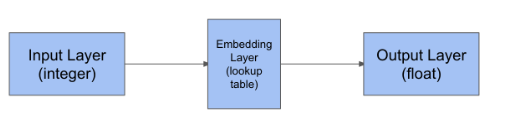

In [7]:
# display category embedding
from IPython import display
display.Image("Images/17_category_embedding.PNG")

In [9]:
# Code for part 2.1 

# define the model
import pandas as pd
from keras.models import Model
from keras.layers import Embedding, Input, Dense, Flatten
from numpy import unique

# get data
games_season = pd.read_csv('17_datasets/basketball_data/games_season.csv')

# count the unique number of teams
n_teams = unique(games_season['team_1']).shape[0]

# create embedding layer
team_lookup = Embedding(input_dim=n_teams, output_dim=1, input_length=1, name='Team-Strength')

# create input layer
teamid_in = Input(shape=(1,))

# lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# combine into a model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')
team_strength_model.summary()


Model: "Team-Strength-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 Team-Strength (Embedding)   (None, 1, 1)              10888     
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 10888 (42.53 KB)
Trainable params: 10888 (42.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Part 2.2 Shared layers

* Shared layers allow you to define an operation and apply it (with exact same weights) on different inputs
* It is only possible with the **Keras functional API**
* You can also share **multiple layers as a model**

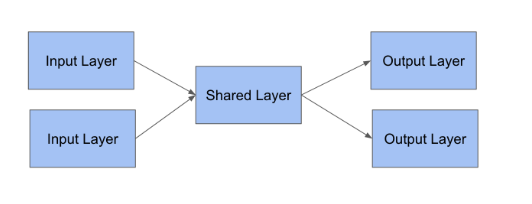

In [1]:
# display shared layers

from IPython import display
display.Image("Images/17_shared_layer.PNG")

In [2]:
# Code for part 2.2 

# defining two inputs

from keras.layers import Input 

# create 2 input layers for both teams
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')


In [8]:
# Code for part 2.2 (continue)

# lookup both inputs in the same model
from keras.layers import Input, Embedding, Flatten
from keras.models import Model
import pandas as pd
from numpy import unique

# create the team strength model with embedding layer
games_season = pd.read_csv('17_datasets/basketball_data/games_season.csv')
n_teams = unique(games_season['team_1']).shape[0]

teamid_in = Input(shape=(1,))
team_lookup = Embedding(input_dim=n_teams, output_dim=1, input_length=1, name='Team-Strength')
strength_lookup = team_lookup(teamid_in)
strength_lookup_flat = Flatten()(strength_lookup)
team_strength_model = Model(teamid_in, strength_lookup_flat)

# lookup both teams in the model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

#### Part 2.3 Merge layers

* It is an *advanced, non-sequential* network topology
* It provides a lot of *flexibility* to design networks 
* Kinds of merge layers:
    1. Add 
    2. Subtract
    3. Multiply
    4. Concatenate
* Note: Only *'concatenate'* can operate on layers that have **different numbers of columns**, other operations can only apply to layers that have **same numbers of columns**

In [9]:
# Code for part 2.3 

# model using two inputsand one output
from keras.layers import Subtract
from keras.models import Model

# create a subtract layer using the inputs from the above exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

# create the model
model = Model([team_in_1, team_in_2], score_diff)

# compile the model
model.compile(optimizer='adam', loss='mae')

#### Part 2.4 Predict from your model

* Use the same *'.fit()'* method, but with a list of inputs
* Use the same *'.evaluate()'* method 

In [10]:
# Code for part 2.4 

# fit the created model to the regular season training data
import pandas as pd

# get the input data
games_season = pd.read_csv('17_datasets/basketball_data/games_season.csv')
input_1 = games_season['team_1']
input_2 = games_season['team_2']

# fit the model to input_1 and input_2, using score_diff as target
model.fit([input_1, input_2], games_season['score_diff'],
          epochs=1, batch_size=2048, validation_split=0.1, verbose=True)


138/138 [==============================] - 2s 3ms/step - loss: 12.1196 - val_loss: 11.8385


In [11]:
# Code for part 2.4 (continue)

# evaluate the model on the tournament data
import pandas as pd

# get tournament data
games_tourney = pd.read_csv('17_datasets/basketball_data/games_tourney.csv')
input_1 = games_tourney['team_1']
input_2 = games_tourney['team_2']

# evaluate the model 
print(model.evaluate([input_1, input_2], games_tourney['score_diff'], verbose=True))

133/133 [==============================] - 0s 886us/step - loss: 11.6829
11.68287181854248


### CHAPTER 3. Three Inputs(and Beyond!)

#### Part 3.1 Three-input models

*

In [ ]:
# Code for part 3.1 

# 